In [4]:
from __future__ import division, print_function
import numpy as np
from sklearn import svm 
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

1. Support Vector Classification
================================


1.1 Load the Iris dataset
---------------

In [5]:
df = pd.read_csv('svm_data.csv')

X = np.array(df.drop(['output'], 1)) 
y = np.array(df['output'])

#X = iris.data[:,:2]
#y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

1.2 Use Support Vector Machine with different kinds of kernels and evaluate performance
------------------------------------------------------------------

In [6]:
def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test)
    correct_classifications = 0
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct_classifications += 1
    accuracy = 100*correct_classifications/len(y_test) #Accuracy as a percentage
    return accuracy

In [7]:
kernels = ('linear','poly','rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    print("{} % accuracy obtained with kernel = {}".format(acc, kernel))

100.0 % accuracy obtained with kernel = linear
100.0 % accuracy obtained with kernel = poly
100.0 % accuracy obtained with kernel = rbf


In [ ]:
print("The support vectors are:\n", .support_vectors_)

1.3 Visualize the decision boundaries
-------------------------------------

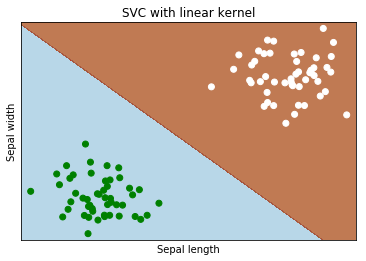

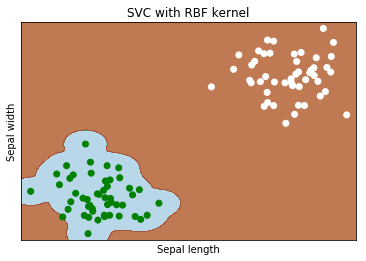

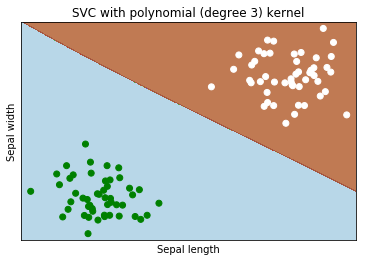

In [12]:
#Train SVMs with different kernels
svc = svm.SVC(kernel='linear',C=10).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7,C=10).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3,C=10).fit(X_train, y_train)

#Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#Define title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(i)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.ocean)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

1.4 Check the support vectors
-----------------------------

In [19]:
#Checking the support vectors of the polynomial kernel (for example)
print("The support vectors svm are:\n", svc.coef_)
#print("The support vectors  poly are:\n", poly_svc.intercept_)
#print("The support vectors  rgb are:\n", rbf_svc.intercept_)

The support vectors svm are:
 [[ 0.09200336  0.08353562]]


2. Support Vector Regression
============================

2.1 Load data from the Boston dataset
-------------------------------------

In [7]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

2.2 Use Support Vector Machine with different kinds of kernels and evaluate performance
----------------------------------

In [8]:
def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test)
    sum_of_squared_error = 0
    for i in range(len(y_test)):
        err = (predictions[i]-y_test[i]) **2
        sum_of_squared_error += err
    mean_squared_error = sum_of_squared_error/len(y_test)
    RMSE = np.sqrt(mean_squared_error) 
    return RMSE

In [9]:
kernels = ('linear','rbf')
RMSE_vec = []
for index, kernel in enumerate(kernels):
    model = svm.SVR(kernel=kernel)
    model.fit(X_train, y_train)
    RMSE = evaluate_on_test_data(model)
    RMSE_vec.append(RMSE)
    print("RMSE={} obtained with kernel = {}".format(RMSE, kernel))

RMSE=5.30510081135 obtained with kernel = linear
RMSE=8.28026482035 obtained with kernel = rbf
